In [1]:
from prophet import Prophet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('rossmann_train.csv', low_memory=False)

In [3]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


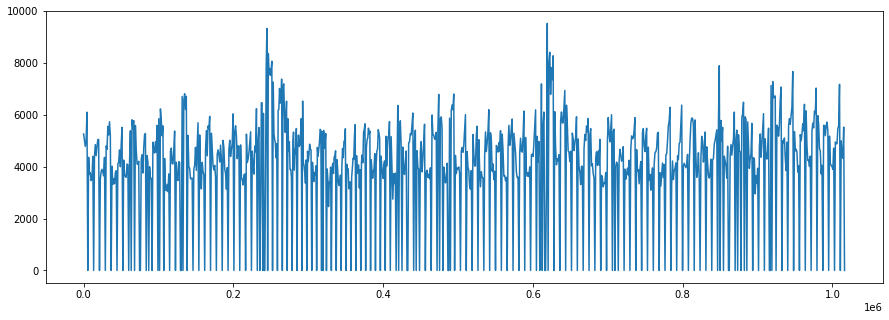

In [4]:
df[df['Store'] == 1]['Sales'].plot(figsize=(15, 5));

In [5]:
(df[df['Store'] == 1]['Sales'] == 0).sum()


161

In [6]:
store1 = df[df['Store'] == 1].copy()


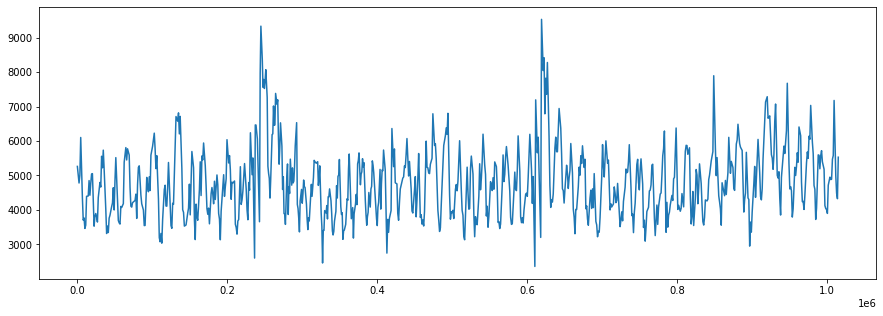

In [7]:
store1[store1['Open'] > 0]['Sales'].plot(figsize=(15, 5));

In [8]:
sales0 = store1[store1['Sales'] == 0].index
customers0 = store1[store1['Customers'] == 0].index
store_closed = store1[store1['Open'] == 0].index
print(np.all(sales0 == customers0))
print(np.all(store_closed == customers0))

True
True


In [9]:
store1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
2230,1,3,2015-07-29,4782,523,1,1,0,1
3345,1,2,2015-07-28,5011,560,1,1,0,1
4460,1,1,2015-07-27,6102,612,1,1,0,1


In [10]:
store1['Date'] = pd.to_datetime(store1['Date'])

In [11]:
store1.set_index('Date', inplace=True)

In [12]:
store1.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-30,1,4,5020,546,1,1,0,1
2015-07-29,1,3,4782,523,1,1,0,1
2015-07-28,1,2,5011,560,1,1,0,1
2015-07-27,1,1,6102,612,1,1,0,1


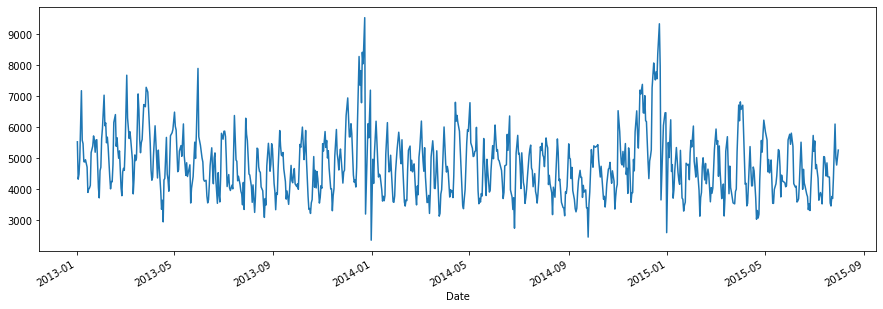

In [13]:
store1[store1['Customers'] > 0]['Sales'].plot(figsize=(15, 5));

In [14]:
df_p = store1[['Sales']].copy()
df_p['Date'] = df_p.index
df_p.head()

,Sales,Date
Date,,
2015-07-31,5263,2015-07-31
2015-07-30,5020,2015-07-30
2015-07-29,4782,2015-07-29
2015-07-28,5011,2015-07-28
2015-07-27,6102,2015-07-27


In [15]:
df_p.sort_index(inplace=True)
df_p.head(20)

,Sales,Date
Date,,
2013-01-01,0,2013-01-01
2013-01-02,5530,2013-01-02
2013-01-03,4327,2013-01-03
2013-01-04,4486,2013-01-04
2013-01-05,4997,2013-01-05
2013-01-06,0,2013-01-06
2013-01-07,7176,2013-01-07
2013-01-08,5580,2013-01-08
2013-01-09,5471,2013-01-09


In [16]:
df_p.tail()

,Sales,Date
Date,,
2015-07-27,6102,2015-07-27
2015-07-28,5011,2015-07-28
2015-07-29,4782,2015-07-29
2015-07-30,5020,2015-07-30
2015-07-31,5263,2015-07-31


In [17]:
df_p.columns = ['y', 'ds']
m = Prophet()
m.fit(df_p)

14:34:15 - cmdstanpy - INFO - Chain [1] start processing
14:34:15 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
future = m.make_future_dataframe(periods=365)
future.head()

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [19]:
future.tail()

,ds
1302,2016-07-26
1303,2016-07-27
1304,2016-07-28
1305,2016-07-29
1306,2016-07-30


In [20]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1302,2016-07-26,3747.516680,2946.451488,5873.826198,3714.466548,3775.476891,713.787322,713.787322,713.787322,706.247293,706.247293,706.247293,7.540029,7.540029,7.540029,0.0,0.0,0.0,4461.304002
1303,2016-07-27,3747.320187,2851.411004,5611.635093,3714.122216,3775.391792,503.023234,503.023234,503.023234,510.491956,510.491956,510.491956,-7.468722,-7.468722,-7.468722,0.0,0.0,0.0,4250.343421
1304,2016-07-28,3747.123695,2465.042236,5334.049174,3713.777885,3775.280776,127.148498,127.148498,127.148498,151.257953,151.257953,151.257953,-24.109455,-24.109455,-24.109455,0.0,0.0,0.0,3874.272193
1305,2016-07-29,3746.927202,2943.112720,5685.062158,3713.434739,3775.168386,531.580814,531.580814,531.580814,573.629403,573.629403,573.629403,-42.048589,-42.048589,-42.048589,0.0,0.0,0.0,4278.508016
1306,2016-07-30,3746.730709,3196.286878,6120.597546,3713.103256,3775.056279,938.165053,938.165053,938.165053,999.097003,999.097003,999.097003,-60.931950,-60.931950,-60.931950,0.0,0.0,0.0,4684.895762


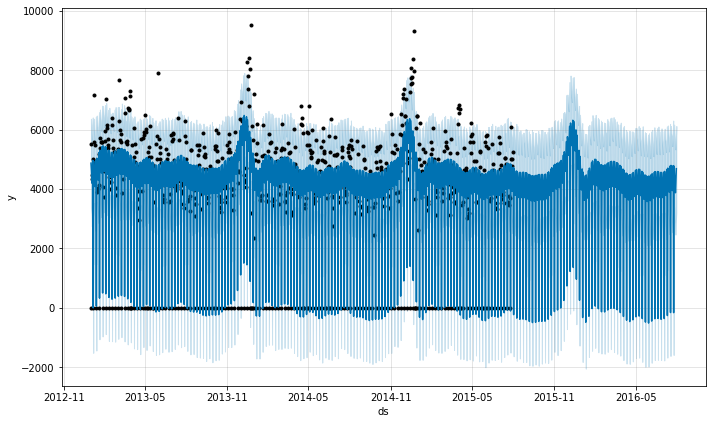

In [21]:
m.plot(forecast);

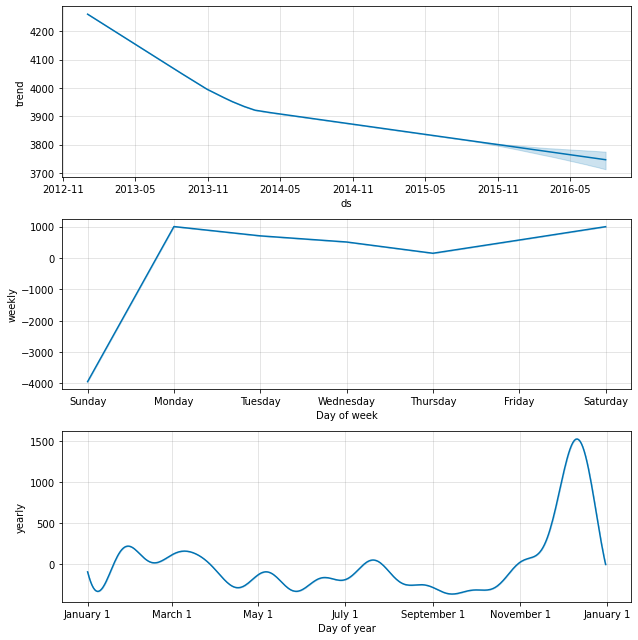

In [22]:
m.plot_components(forecast);

In [23]:
df_p2 = store1[store1['Open'] > 0][['Sales']].copy()
df_p2['Date'] = df_p2.index

In [24]:
df_p2.head()

,Sales,Date
Date,,
2015-07-31,5263,2015-07-31
2015-07-30,5020,2015-07-30
2015-07-29,4782,2015-07-29
2015-07-28,5011,2015-07-28
2015-07-27,6102,2015-07-27


In [25]:
df_p2.columns = ['y', 'ds']

14:35:41 - cmdstanpy - INFO - Chain [1] start processing
14:35:41 - cmdstanpy - INFO - Chain [1] done processing


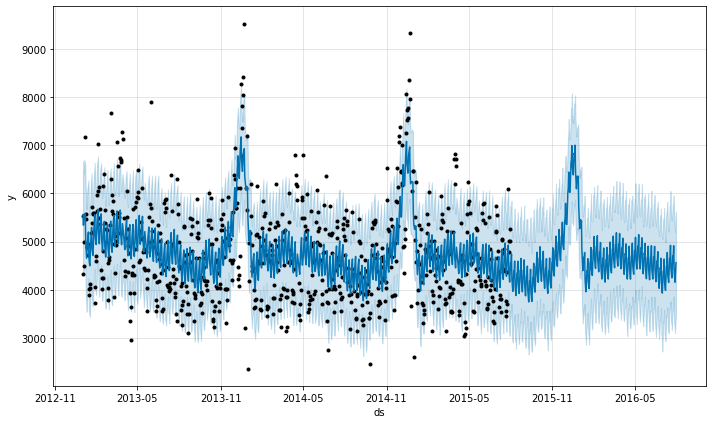

In [26]:
m2 = Prophet()
m2.fit(df_p2)
future2 = m2.make_future_dataframe(periods=365)
forecast2 = m2.predict(future2)
m2.plot(forecast2);

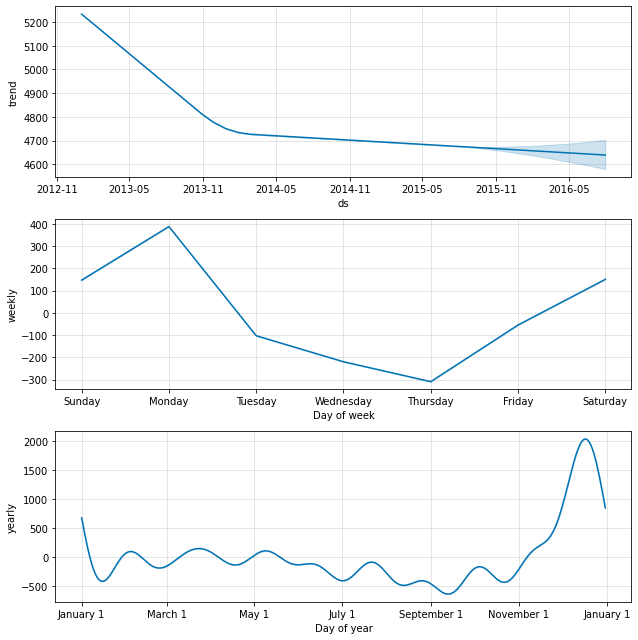

In [27]:
m2.plot_components(forecast2);

In [28]:
m3 = Prophet()
m3.add_country_holidays(country_name='US')
m3.fit(df_p2)

14:36:14 - cmdstanpy - INFO - Chain [1] start processing
14:36:14 - cmdstanpy - INFO - Chain [1] done processing


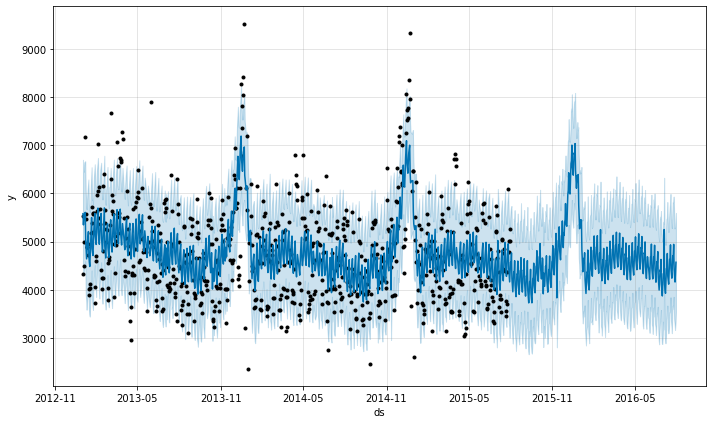

In [29]:
future3 = m3.make_future_dataframe(periods=365)
forecast3 = m3.predict(future3)
m3.plot(forecast3);

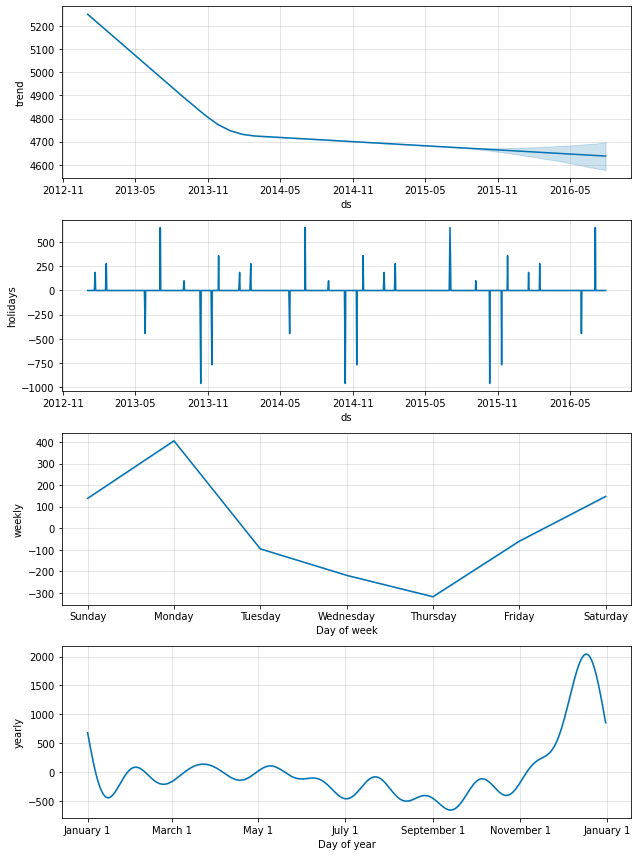

In [30]:
m3.plot_components(forecast3);

In [31]:
set(store1['StateHoliday'])
{'0', 'a', 'b', 'c'}
set(store1['SchoolHoliday'])
{0, 1}
df_p['open'] = store1['Open']
df_p['promo'] = store1['Promo']
df_p[['SH1', 'SH2', 'SH3']] = pd.get_dummies(
    store1['StateHoliday'], drop_first=True)
df_p['SchoolHoliday'] = store1['SchoolHoliday']
df_p.head(20)

,y,ds,open,promo,SH1,SH2,SH3,SchoolHoliday
Date,,,,,,,,
2013-01-01,0,2013-01-01,0,0,1,0,0,1
2013-01-02,5530,2013-01-02,1,0,0,0,0,1
2013-01-03,4327,2013-01-03,1,0,0,0,0,1
2013-01-04,4486,2013-01-04,1,0,0,0,0,1
2013-01-05,4997,2013-01-05,1,0,0,0,0,1
2013-01-06,0,2013-01-06,0,0,0,0,0,1
2013-01-07,7176,2013-01-07,1,1,0,0,0,1
2013-01-08,5580,2013-01-08,1,1,0,0,0,1
2013-01-09,5471,2013-01-09,1,1,0,0,0,1


In [32]:
m4 = Prophet()
m4.add_regressor('open', mode='multiplicative')
m4.add_regressor('promo', mode='additive')
m4.add_regressor('SH1', mode='additive')
m4.add_regressor('SH2', mode='additive')
m4.add_regressor('SH3', mode='additive')
m4.add_regressor('SchoolHoliday', mode='additive')
m4.fit(df_p)

14:37:27 - cmdstanpy - INFO - Chain [1] start processing
14:37:27 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
future4 = m4.make_future_dataframe(periods=365)
train_idx = future4['ds'].isin(df_p.index)
test_idx = ~train_idx
regressors = ['open', 'promo', 'SH1', 'SH2', 'SH3', 'SchoolHoliday']
for r in regressors:
  future4.loc[train_idx, r] = df_p[r].to_list()
# let's just pretend we know this, even though we do not
# it would take a lot of work to gather this data
future4.loc[test_idx, 'open'] = \
  future4.loc[test_idx, 'ds'].apply(lambda x: 1.0 * (x.weekday() != 6))

for r in regressors[1:]:
  future4.loc[test_idx, r] = \
    df_p.iloc[-365:][r].to_list()


In [35]:
future4.tail(10)

,ds,open,promo,SH1,SH2,SH3,SchoolHoliday
1297,2016-07-21,1.0,0.0,0.0,0.0,0.0,0.0
1298,2016-07-22,1.0,0.0,0.0,0.0,0.0,0.0
1299,2016-07-23,1.0,0.0,0.0,0.0,0.0,0.0
1300,2016-07-24,0.0,0.0,0.0,0.0,0.0,0.0
1301,2016-07-25,1.0,0.0,0.0,0.0,0.0,0.0
1302,2016-07-26,1.0,1.0,0.0,0.0,0.0,1.0
1303,2016-07-27,1.0,1.0,0.0,0.0,0.0,1.0
1304,2016-07-28,1.0,1.0,0.0,0.0,0.0,1.0
1305,2016-07-29,1.0,1.0,0.0,0.0,0.0,1.0
1306,2016-07-30,1.0,1.0,0.0,0.0,0.0,1.0


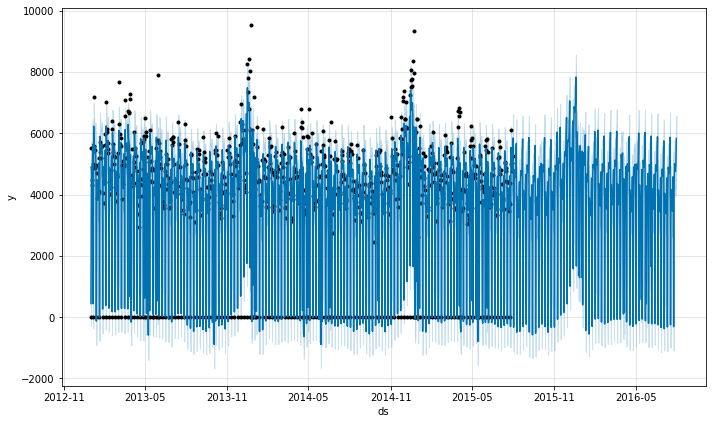

In [36]:
forecast4 = m4.predict(future4)
m4.plot(forecast4);

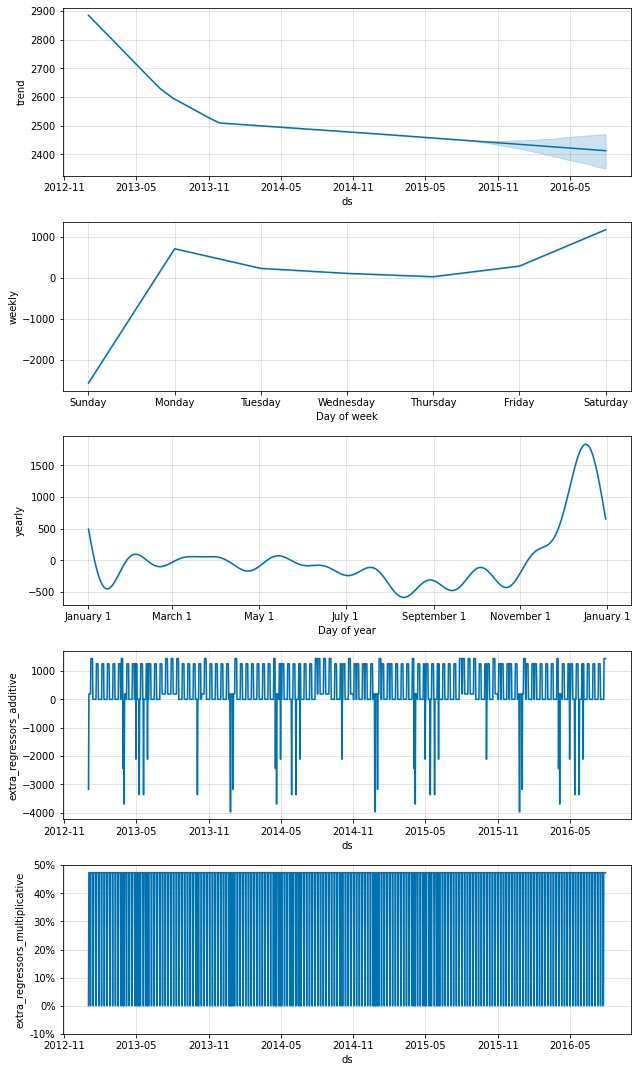

In [37]:
m4.plot_components(forecast4);

In [39]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(
    m,
    initial='730 days',
    period='30 days',
    horizon='60 days')

  0%|          | 0/6 [00:00<?, ?it/s]

15:18:05 - cmdstanpy - INFO - Chain [1] start processing
15:18:05 - cmdstanpy - INFO - Chain [1] done processing
15:18:05 - cmdstanpy - INFO - Chain [1] start processing
15:18:05 - cmdstanpy - INFO - Chain [1] done processing
15:18:06 - cmdstanpy - INFO - Chain [1] start processing
15:18:06 - cmdstanpy - INFO - Chain [1] done processing
15:18:06 - cmdstanpy - INFO - Chain [1] start processing
15:18:06 - cmdstanpy - INFO - Chain [1] done processing
15:18:06 - cmdstanpy - INFO - Chain [1] start processing
15:18:06 - cmdstanpy - INFO - Chain [1] done processing
15:18:06 - cmdstanpy - INFO - Chain [1] start processing
15:18:06 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-03,4601.989206,3116.342988,6024.685832,5023,2015-01-02
1,2015-01-04,-449.490949,-1948.049299,970.615056,0,2015-01-02
2,2015-01-05,4564.030105,2996.223866,5957.074672,6239,2015-01-02
3,2015-01-06,4178.850809,2803.816483,5726.265081,4574,2015-01-02
4,2015-01-07,3941.023372,2506.079606,5496.632182,4796,2015-01-02
...,...,...,...,...,...,...
355,2015-07-27,4757.994007,3365.141374,6230.208602,6102,2015-06-01
356,2015-07-28,4433.201506,3028.866781,5921.799095,5011,2015-06-01
357,2015-07-29,4218.524112,2767.632200,5614.566247,4782,2015-06-01
358,2015-07-30,3842.839283,2329.439757,5263.219025,5020,2015-06-01


In [41]:
from prophet.diagnostics import performance_metrics
pm = performance_metrics(df_cv)
pm

,horizon,mse,rmse,mae,mdape,smape,coverage
0,6 days,2.223108e+06,1491.009088,920.699052,0.137179,0.550604,0.805556
1,7 days,1.586054e+06,1259.386381,757.906819,0.129577,0.491539,0.833333
2,8 days,1.458272e+06,1207.589413,703.499184,0.122445,0.485860,0.888889
3,9 days,1.166029e+06,1079.828342,688.324627,0.143563,0.453374,0.916667
4,10 days,5.051220e+05,710.719354,576.850816,0.152362,0.459767,0.944444
5,11 days,4.966328e+05,704.721816,568.208537,0.144649,0.403030,0.944444
6,12 days,8.591177e+05,926.886010,632.088067,0.144649,0.449876,0.944444
7,13 days,8.296922e+05,910.874400,605.705365,0.137426,0.441580,0.944444
8,14 days,7.869409e+05,887.096916,568.257631,0.125837,0.433139,0.944444
9,15 days,6.604742e+05,812.695644,500.105394,0.102794,0.414918,0.972222


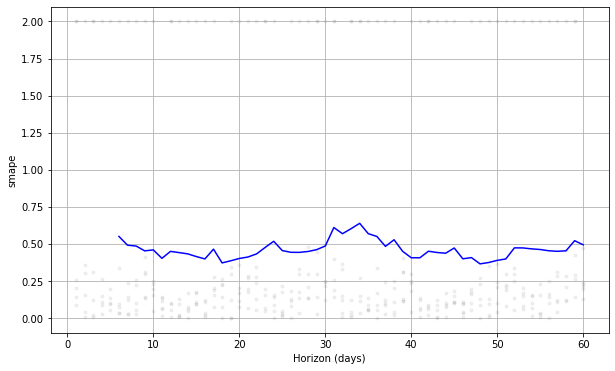

In [42]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='smape');

  0%|          | 0/6 [00:00<?, ?it/s]

15:29:09 - cmdstanpy - INFO - Chain [1] start processing
15:29:09 - cmdstanpy - INFO - Chain [1] done processing
15:29:09 - cmdstanpy - INFO - Chain [1] start processing
15:29:09 - cmdstanpy - INFO - Chain [1] done processing
15:29:09 - cmdstanpy - INFO - Chain [1] start processing
15:29:09 - cmdstanpy - INFO - Chain [1] done processing
15:29:09 - cmdstanpy - INFO - Chain [1] start processing
15:29:09 - cmdstanpy - INFO - Chain [1] done processing
15:29:09 - cmdstanpy - INFO - Chain [1] start processing
15:29:09 - cmdstanpy - INFO - Chain [1] done processing
15:29:09 - cmdstanpy - INFO - Chain [1] start processing
15:29:09 - cmdstanpy - INFO - Chain [1] done processing


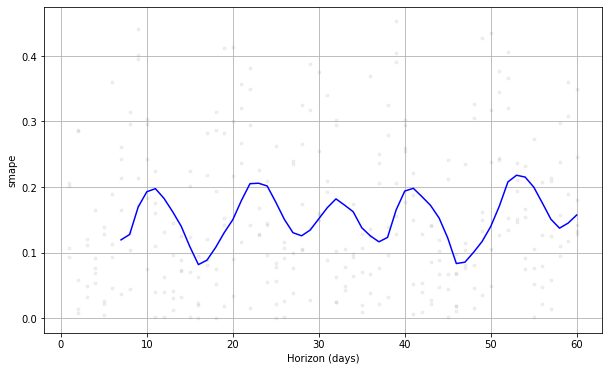

In [43]:
df_cv2 = cross_validation(
    m2,
    initial='730 days',
    period='30 days',
    horizon='60 days')
pm2 = performance_metrics(df_cv2)
plot_cross_validation_metric(df_cv2, metric='smape');

  0%|          | 0/6 [00:00<?, ?it/s]

15:30:37 - cmdstanpy - INFO - Chain [1] start processing
15:30:37 - cmdstanpy - INFO - Chain [1] done processing
15:30:37 - cmdstanpy - INFO - Chain [1] start processing
15:30:38 - cmdstanpy - INFO - Chain [1] done processing
15:30:38 - cmdstanpy - INFO - Chain [1] start processing
15:30:38 - cmdstanpy - INFO - Chain [1] done processing
15:30:38 - cmdstanpy - INFO - Chain [1] start processing
15:30:38 - cmdstanpy - INFO - Chain [1] done processing
15:30:38 - cmdstanpy - INFO - Chain [1] start processing
15:30:38 - cmdstanpy - INFO - Chain [1] done processing
15:30:38 - cmdstanpy - INFO - Chain [1] start processing
15:30:38 - cmdstanpy - INFO - Chain [1] done processing


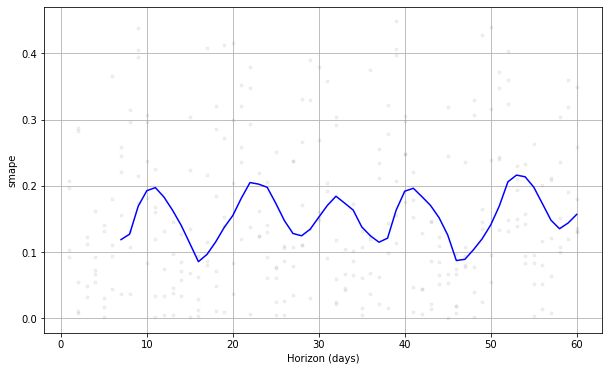

In [44]:
df_cv3 = cross_validation(
    m3,
    initial='730 days',
    period='30 days',
    horizon='60 days')
pm3 = performance_metrics(df_cv3)
plot_cross_validation_metric(df_cv3, metric='smape');

  0%|          | 0/6 [00:00<?, ?it/s]

15:31:29 - cmdstanpy - INFO - Chain [1] start processing
15:31:29 - cmdstanpy - INFO - Chain [1] done processing
15:31:29 - cmdstanpy - INFO - Chain [1] start processing
15:31:29 - cmdstanpy - INFO - Chain [1] done processing
15:31:29 - cmdstanpy - INFO - Chain [1] start processing
15:31:29 - cmdstanpy - INFO - Chain [1] done processing
15:31:29 - cmdstanpy - INFO - Chain [1] start processing
15:31:29 - cmdstanpy - INFO - Chain [1] done processing
15:31:30 - cmdstanpy - INFO - Chain [1] start processing
15:31:30 - cmdstanpy - INFO - Chain [1] done processing
15:31:30 - cmdstanpy - INFO - Chain [1] start processing
15:31:30 - cmdstanpy - INFO - Chain [1] done processing


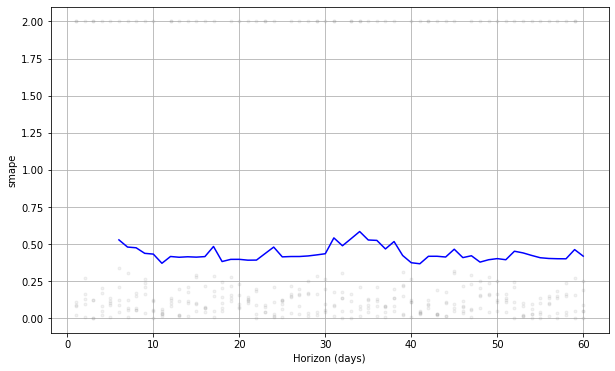

In [46]:
df_cv4 = cross_validation(
    m4,
    initial='730 days',
    period='30 days',
    horizon='60 days')
pm4 = performance_metrics(df_cv4)
plot_cross_validation_metric(df_cv4, metric='smape');

In [47]:
pm['smape'].mean(), pm2['smape'].mean(), pm3['smape'].mean(), pm4['smape'].mean()

(0.46165989254878137,
 0.1537070859607047,
 0.15399602382870345,
 0.4356884170024636)

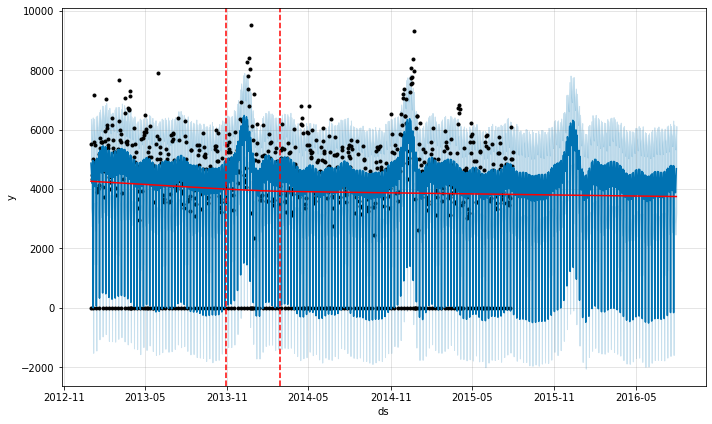

In [48]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

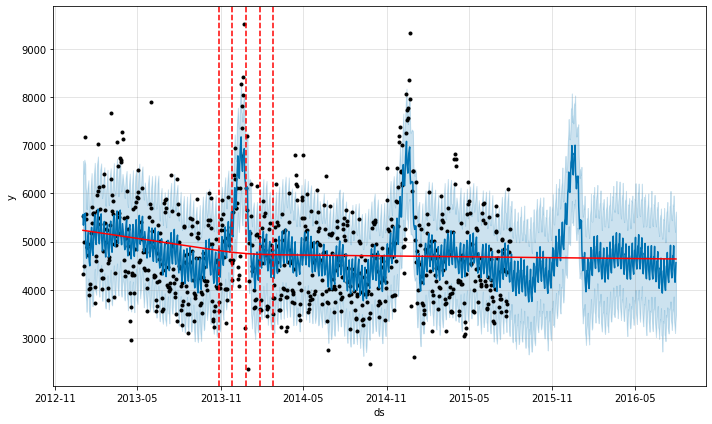

In [49]:
fig = m2.plot(forecast2)
a = add_changepoints_to_plot(fig.gca(), m2, forecast2)

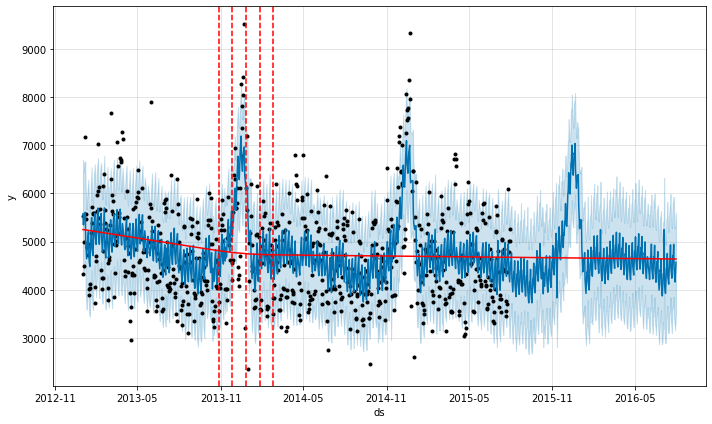

In [50]:
fig = m3.plot(forecast3)
a = add_changepoints_to_plot(fig.gca(), m3, forecast3)

15:35:17 - cmdstanpy - INFO - Chain [1] start processing
15:35:18 - cmdstanpy - INFO - Chain [1] done processing


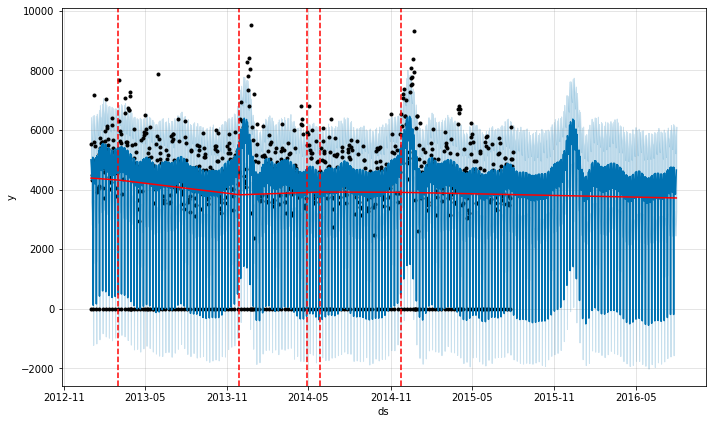

In [51]:
m_a = Prophet(changepoint_prior_scale=0.5)
forecast_a = m_a.fit(df_p).predict(future)
fig = m_a.plot(forecast_a)
a = add_changepoints_to_plot(fig.gca(), m_a, forecast_a)

15:35:45 - cmdstanpy - INFO - Chain [1] start processing
15:35:46 - cmdstanpy - INFO - Chain [1] done processing


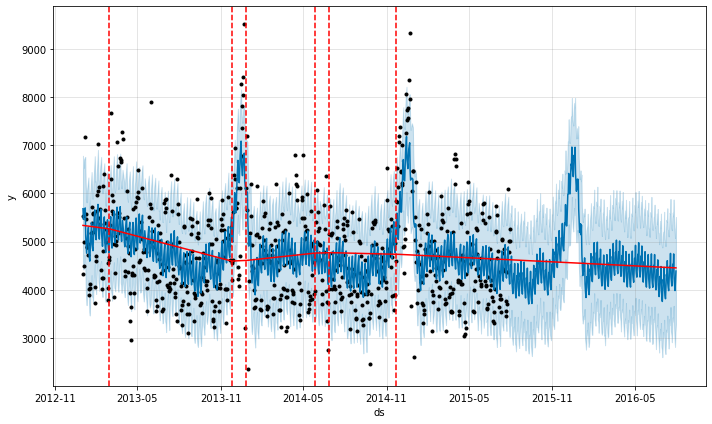

In [52]:
m2_a = Prophet(changepoint_prior_scale=0.5)
forecast2_a = m2_a.fit(df_p2).predict(future2)
fig = m2_a.plot(forecast2_a)
a = add_changepoints_to_plot(fig.gca(), m2_a, forecast2_a)

15:35:59 - cmdstanpy - INFO - Chain [1] start processing
15:35:59 - cmdstanpy - INFO - Chain [1] done processing


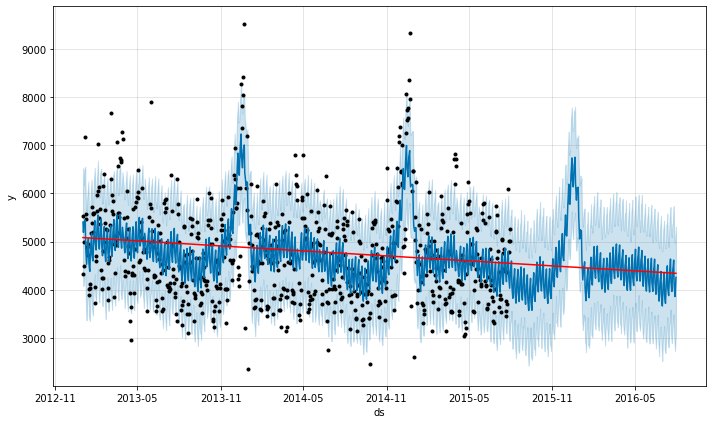

In [53]:
m2_a = Prophet(changepoint_prior_scale=0.005)
forecast2_a = m2_a.fit(df_p2).predict(future2)
fig = m2_a.plot(forecast2_a)
a = add_changepoints_to_plot(fig.gca(), m2_a, forecast2_a)